python 种Apriori算法有 2 种实现
- apyori库是一个经典的库，它使用起来较为简单，不过有时会漏掉一些强关联规则；
- mlxtend库的使用稍显麻烦，但是它能捕捉到所有的强关联规则。

from platform import python_revision


利用apyori库和mlxtend库来编写代码前，需要读取数据并进行简单的预处理，因为这两个库可处理的都是如下所示的双重列表结构

```python
transactions = [['A', 'B', 'C'], ['A', 'B'], ['B', 'C'], ['A', 'B','C', 'D'], ['B', 'C', 'D']]
```

# apyori库实现Apriori算法

In [1]:
transactions = [['A', 'B', 'C'], ['A', 'B'], ['B', 'C'], ['A', 'B','C', 'D'], ['B', 'C', 'D']]

In [3]:
from unittest import result
from apyori import apriori
# min_support 最小支持度
# min_confidence 最小置信度
rules=apriori(transactions,min_support=0.4,min_confidence=0.8)
results=list(rules)
results

[RelationRecord(items=frozenset({'B'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'B'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'C'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'C'}), confidence=0.8, lift=1.0)]),
 RelationRecord(items=frozenset({'A', 'B'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset({'A'}), items_add=frozenset({'B'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'C', 'B'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'C', 'B'}), confidence=0.8, lift=1.0), OrderedStatistic(items_base=frozenset({'B'}), items_add=frozenset({'C'}), confidence=0.8, lift=1.0), OrderedStatistic(items_base=frozenset({'C'}), items_add=frozenset({'B'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'D', 'B'}), support=0.4, ordered_statistics=[OrderedStatistic

In [4]:
for i in results:#遍历频繁项集
    for j in i.ordered_statistics:#获取频繁项集的关联规则
        X=j.items_base#关联规则前件
        Y=j.items_add#关联规则后见
        x=', '.join([item for item in X])
        y=', '.join([item for item in Y])
        if x!='':#防止前件为空情况
            print(x+'-->'+y)

A-->B
B-->C
C-->B
D-->B
D-->C
A, C-->B
D-->C, B
D, B-->C
D, C-->B


# mlxtend库实现Apriori算法

mlxtend库中的apriori()函数可接受的数据类型为由布尔值（又称bool型数据，内容为True或Flase）或0/1值构成的DataFrame，所以需要先使用mlxtend库中的TransactionEncoder()函数对数据进行预处理

In [6]:
from mlxtend.preprocessing import TransactionEncoder
TE=TransactionEncoder() #构造转换模型
data=TE.fit_transform(transactions) #将原始数据转换为布尔值
import pandas as pd
df=pd.DataFrame(data,columns=TE.columns_)
df.head()

,A,B,C,D
0,True,True,True,False
1,True,True,False,False
2,False,True,True,False
3,True,True,True,True
4,False,True,True,True


In [7]:
from mlxtend.frequent_patterns import apriori\
# min_support 最小支持度
# use_colnames 用变量df的列名作为返回的频繁项集中项的名称
items=apriori(df,min_support=0.4,use_colnames=True)
items

,support,itemsets
0,0.6,(A)
1,1.0,(B)
2,0.8,(C)
3,0.4,(D)
4,0.6,"(A, B)"
5,0.4,"(A, C)"
6,0.8,"(C, B)"
7,0.4,"(D, B)"
8,0.4,"(D, C)"
9,0.4,"(A, C, B)"


In [8]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(items,min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(B),0.6,1.0,0.6,1.0,1.00,0.00,inf
1,(C),(B),0.8,1.0,0.8,1.0,1.00,0.00,inf
2,(B),(C),1.0,0.8,0.8,0.8,1.00,0.00,1.0
3,(D),(B),0.4,1.0,0.4,1.0,1.00,0.00,inf
4,(D),(C),0.4,0.8,0.4,1.0,1.25,0.08,inf
5,"(A, C)",(B),0.4,1.0,0.4,1.0,1.00,0.00,inf
6,"(D, C)",(B),0.4,1.0,0.4,1.0,1.00,0.00,inf
7,"(D, B)",(C),0.4,0.8,0.4,1.0,1.25,0.08,inf
8,(D),"(C, B)",0.4,0.8,0.4,1.0,1.25,0.08,inf


antecedents列代表关联规则中的前件，如关联规则{A}→{B}中的{A}；

consequents列代表关联规则中的后件，如关联规则{A}→{B}中的{B}；

antecedent support列代表前件的支持度，例如，A共出现3次（共5笔事务），所以关联前件支持度为3/5＝0.6；

consequent support列代表后件的支持度，例如，B共出现5次，所以关联后件支持度为5/5＝1；

support列代表该关联规则的支持度，例如，{A，B}共出现3次，所以关联规则的支持度为3/5＝0.6；

confidence列代表该关联规则的置信度，除了用15.1.1小节中的公式计算外，还可以用“关联规则支持度/前件支持度”来计算，代入数值为（3/5）÷（3/5）＝1。

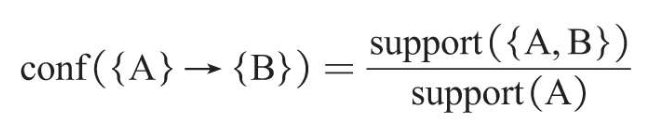




lift列代表该关联规则的提升度，其计算公式为“关联规则支持度/（前件支持度×后件支持度）”，如下所示，代入数值为0.6÷（0.6×1）＝1。该值越大，表明X和Y的关联度越强。





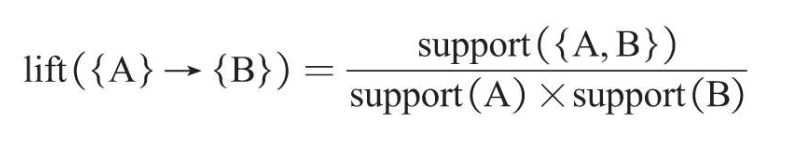

leverage列代表关联规则的杠杆率，其计算公式为“关联规则支持度-前件支持度×后件支持度”，如下所示，代入数值为0.6-0.6×1＝0。该值越大，表明X和Y的关联度越强。

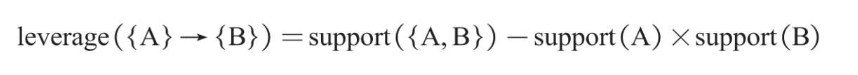

conviction列代表关联规则的确信度，其计算公式为“（1-后件支持度）/（1-关联规则置信度）”，如下所示，代入数值为（1-1）/（1-1）＝∞。该值越大，表明X和Y的关联度越强。

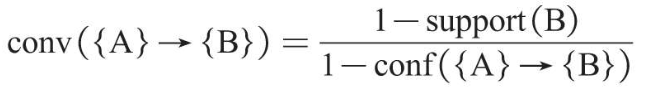

In [9]:
for i,j in rules.iterrows():
    X=j['antecedents']
    Y=j['consequents']
    x=', '.join([item for item in X])
    y=', '.join([item for item in Y])
    print(x+'-->'+y)

A-->B
C-->B
B-->C
D-->B
D-->C
A, C-->B
D, C-->B
D, B-->C
D-->C, B


# 病症关联规则分析

## 案例背景

假设有一种医学理论认为，五脏和一些病症之间存在关联关系，见下表。例如，如果一个人的脾出了问题，那么他身上除了会表现出与脾关联的便秘病症，很可能还会伴随着消化不良的病症。

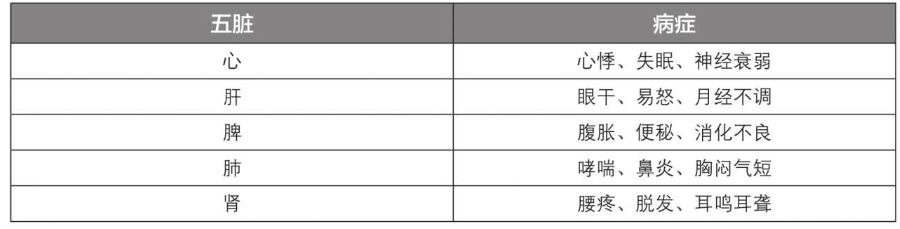

该医学理论还认为，我们的五脏六腑不是一个个独立的脏器，而是相互联系、相互影响的。有时某一个脏器出了问题，会影响其关联的脏器，患者身上就会同时表现出这两种脏器的关联病症。例如，一个患者感到腰疼或者有脱发现象（肾的关联病症），很可能就会伴有眼干或易怒等病症（肝的关联病症）。本案例的目标就是通过Apriori算法对病症数据进行分析，挖掘病症之间的关联关系。

In [13]:
import pandas as pd
df=pd.read_excel('./data/中医辨证.xlsx')
df.head()

,病人编号,病人症状
0,1,"消化不良,便秘"
1,2,"心悸,失眠"
2,3,"腰疼,脱发,眼干"
3,4,"腹胀,便秘,哮喘,胸闷气短,消化不良"
4,5,"神经衰弱,失眠,月经不调"


提取“患者病症”列的内容，并将其转换为双重列表结构

In [17]:
symptoms=[]
for i in df['病人症状'].tolist():
    symptoms.append(i.split(','))
symptoms[:5]

[['消化不良', '便秘'],
 ['心悸', '失眠'],
 ['腰疼', '脱发', '眼干'],
 ['腹胀', '便秘', '哮喘', '胸闷气短', '消化不良'],
 ['神经衰弱', '失眠', '月经不调']]

## apyori库

In [19]:
from apyori import apriori
rules=apriori(symptoms,min_support=0.1,min_confidence=0.7)
results=list(rules)
results

[RelationRecord(items=frozenset({'消化不良', '便秘'}), support=0.16, ordered_statistics=[OrderedStatistic(items_base=frozenset({'便秘'}), items_add=frozenset({'消化不良'}), confidence=0.8695652173913044, lift=2.527805864509606)]),
 RelationRecord(items=frozenset({'月经不调', '失眠'}), support=0.318, ordered_statistics=[OrderedStatistic(items_base=frozenset({'失眠'}), items_add=frozenset({'月经不调'}), confidence=0.8091603053435115, lift=1.6718188126932056)]),
 RelationRecord(items=frozenset({'消化不良', '神经衰弱'}), support=0.164, ordered_statistics=[OrderedStatistic(items_base=frozenset({'神经衰弱'}), items_add=frozenset({'消化不良'}), confidence=0.8723404255319149, lift=2.5358733300346366)]),
 RelationRecord(items=frozenset({'眼干', '脱发'}), support=0.143, ordered_statistics=[OrderedStatistic(items_base=frozenset({'脱发'}), items_add=frozenset({'眼干'}), confidence=0.9470198675496688, lift=3.0450799599667806)]),
 RelationRecord(items=frozenset({'眼干', '腰疼'}), support=0.136, ordered_statistics=[OrderedStatistic(items_base=frozense

In [20]:
for i in results:#遍历频繁项集
    for j in i.ordered_statistics:#获取频繁项集的关联规则
        X=j.items_base#关联规则前件
        Y=j.items_add#关联规则后见
        x=', '.join([item for item in X])
        y=', '.join([item for item in Y])
        if x!='':#防止前件为空情况
            print(x+'-->'+y)

便秘-->消化不良
失眠-->月经不调
神经衰弱-->消化不良
脱发-->眼干
腰疼-->眼干
心悸, 失眠-->月经不调
心悸, 神经衰弱-->消化不良


## mlxtend库

In [28]:
from mlxtend.preprocessing import TransactionEncoder
TE=TransactionEncoder()
data=TE.fit_transform(symptoms)
df=pd.DataFrame(data,columns=TE.columns_)

In [29]:
from mlxtend.frequent_patterns import apriori
items=apriori(df,min_support=0.1,use_colnames=True)
from mlxtend.frequent_patterns import association_rules
rules=association_rules(items,min_threshold=0.7)

In [30]:
for i,j in rules.iterrows():
    X=j['antecedents']
    Y=j['consequents']
    x=', '.join([item for item in X])
    y=', '.join([item for item in Y])
    print(x+'-->'+y)

便秘-->消化不良
失眠-->月经不调
神经衰弱-->消化不良
脱发-->眼干
腰疼-->眼干
心悸, 失眠-->月经不调
心悸, 神经衰弱-->消化不良
